# Titanic 

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

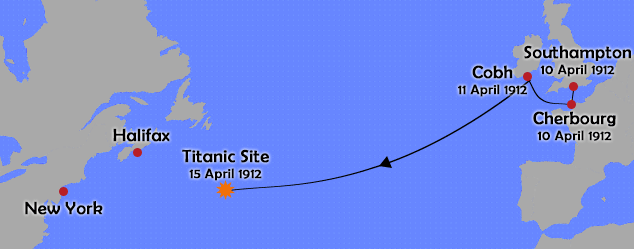

In [37]:
from IPython.display import Image
Image(filename='../img/titanic-route.gif')

# Heuristic Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

# Heuristic Metric
Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

#### Borrowed ideas from:
- https://www.kaggle.com/rajmehra03/eda-data-visualization-n-predictions-with-titanic

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

Data Set Information:
- PassengerId: ID randomly assigned by Kaggle to data set
- Survived: Prediction if the passenger survived or did not survive
- Pclass: Ticket class - 1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Name of passenger:
- Sex: Gender of passenger
- Age: Age in years	
- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic	
- Ticket: Ticket number	
- Fare: Passenger fare	
- Cabin: Cabin number
- Embarked: Port of Embarkation 
    - C = Cherbourg, France
    - Q = Queenstown, Ireland
    - S = Southampton, England 

In [2]:
df_train=pd.read_csv(r'file:///Users/stirlingwaite/Projects/personal/utah-data-engineering-pyspark/data/train.csv')
df_test=pd.read_csv(r'file:///Users/stirlingwaite/Projects/personal/utah-data-engineering-pyspark/data/test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Survived is the target variable that we have to predict. 0 means die and 1 means survival.
## Now some of the more relevant features that I will focus on include:
    
- Pclass:
- Sex:
- Age:
- Fare:
- Embarked:

## The training dataset has 891 rows or training examples and 12 columns or features. Out of these the 'Survived' is our target variable.

In [3]:
df_train.head()
df_train.index
df_train.columns
df_train.shape

(891, 12)

In [4]:
# displays different descriptive measures of the numerical features.
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Some Observations
1. Age has less than 891 implies that it has some missing(Nan) values.
2. The mean of survived indicates that only 38% people survived and rest died.
3. The age varies from 0.42 to 80. 
3. Age less than 1 yr is represented as decimal. 50% denotes the median value of features.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Other Observations
1. Age and cabin both have missing values. 
2. Emabarked has some nan values.
3. Can also use .isnull().sum() to get the count of missing values

## Of the given 891 examples 549 people died while only 342 survived.

In [6]:
df_train.groupby('Survived').Survived.count() 

Survived
0    549
1    342
Name: Survived, dtype: int64

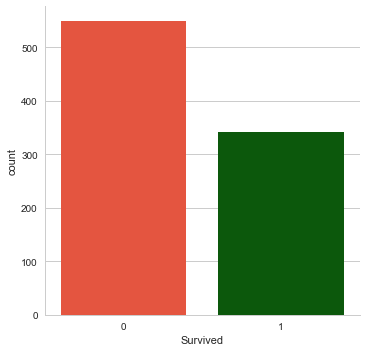

In [7]:
sns.factorplot(x='Survived', data=df_train, kind='count', palette=['#ff4125','#006400'], size=5, aspect=1)

### Plot distributions of age of passengers who survived or did not survive

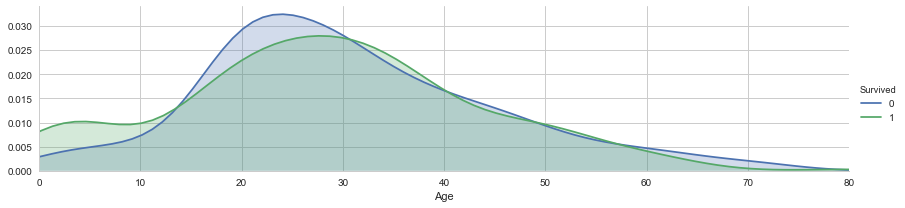

In [8]:
a = sns.FacetGrid(df_train, hue = 'Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0, df_train['Age'].max()))
a.add_legend()

## Consider 'Gender' as a feature

In [9]:
df_train[df_train.Survived==1].groupby('Sex').Survived.count()
pd.crosstab(index=[df_train.Sex], columns=[df_train.Survived], margins=True) # set normalize=True to view %.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


# 233 females survived while only 109 males survived
- This clearly shows that more females survived than males did. 
- The following graph clearly shows the picture.

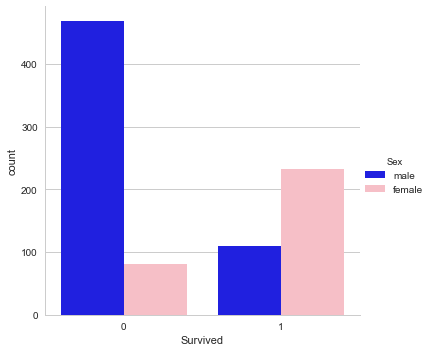

In [10]:
sns.factorplot(x='Survived', data=df_train, hue='Sex', palette=['#0000ff','#FFB6C1'], kind='count', size=5, aspect=1)

In [11]:
pd.crosstab(index=[df_train.Sex],columns=[df_train.Survived], margins=True, normalize='index') 

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


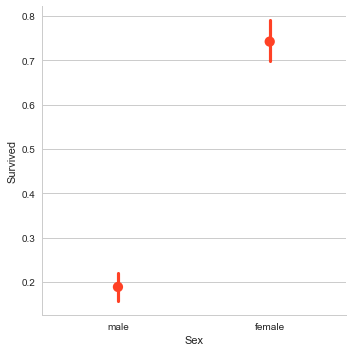

In [12]:
sns.factorplot(x='Sex', y='Survived', kind='point', data=df_train, palette=['#ff4125'], size=5, aspect=1)

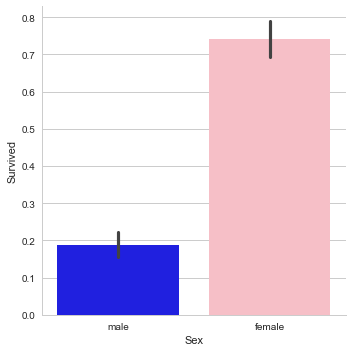

In [13]:
sns.factorplot(x='Sex', y='Survived',data=df_train, kind='bar', palette=['#0000ff','#FFB6C1'], size=5, aspect=1)

## Overall around 18% of all males survived whereas around 75% of females survived. 
- This again shows that females survived in greater numbers

------------------
# Consider 'Pclass' feature

In [14]:
df_train[df_train.Survived==1].groupby('Pclass').Survived.count()
pd.crosstab(index=[df_train.Pclass],columns=[df_train.Survived],margins=True) # set normalize=index to view rowwise %.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


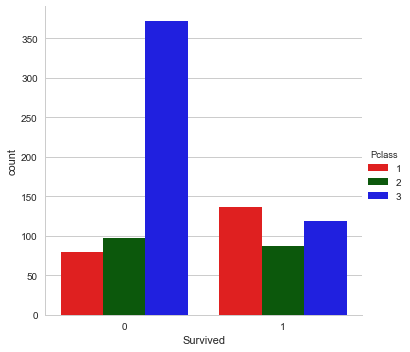

In [15]:
sns.factorplot(x='Survived', y=None, hue='Pclass', kind='count', data=df_train, size=5, aspect=1, palette=['#ff0000','#006400','#0000ff'])

In [16]:
df_train[df_train.Survived==1].groupby('Pclass').Survived.count()
pd.crosstab(index=[df_train.Pclass], columns=[df_train.Survived], margins=True, normalize=True) # set normalize=index to view rowwise %.

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


### This again shows that 38% of people survived the accident 
- This highlights that: 
    - 9% of total passengers who traveled in Pclass 2 survived
    - 15% of passengers in Pclass 1 survived

In [17]:
pd.crosstab(index=[df_train.Pclass],columns=[df_train.Survived],margins=True,normalize='index') 

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


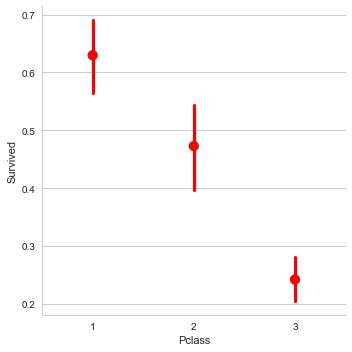

In [18]:
sns.factorplot(x='Pclass',y='Survived',kind='point',data=df_train,size=5,aspect=1,palette=['#ff0000'])

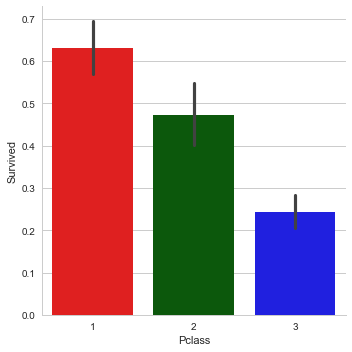

In [19]:
sns.factorplot(x='Pclass',y='Survived',data=df_train,kind='bar',palette=['#ff0000','#006400','#0000ff'],size=5,aspect=1)

### This shows an even better picture
- Class 3 - 75% of people died and only 24% survived
- Class 2 - Similar results 
- Class 1 - 37% died and rest survived 

### In a nutshell most of the people in pclass 1 survived

In [20]:
pd.crosstab(index=[df_train.Sex, df_train.Pclass], columns=[df_train.Survived], margins=True) 

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

### Grouping by both male or female and the respective Pclasses
- The result clearly shows that most of the male in class 2 and 3 died
- Most of the females in class 1 and 2 survived (see the tabulation above)

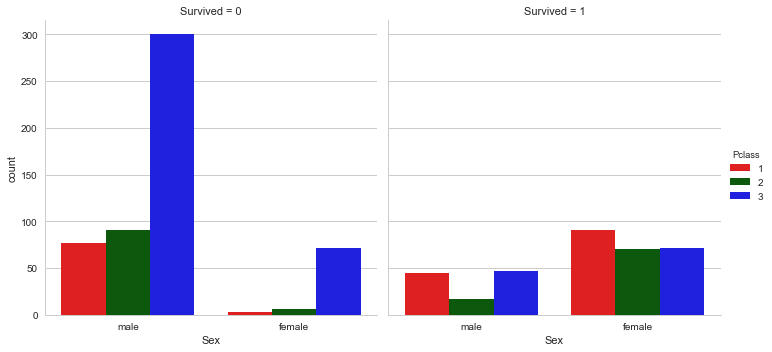

In [21]:
sns.factorplot(x='Sex',hue='Pclass', data=df_train, col='Survived', kind='count', palette=['#ff0000','#006400','#0000ff'], size=5, aspect=1)

### This graph highlights the picture very clearly.   
- Majority of the males in class 2 and 3 died.   
    - This is because they were males and were traveling in a lower class and hence this makes sense. 
- Most of the females in class 1 and 2 survived 
    - Females were given priority if they were traveling in higher classes

-----------------------------
# Now let us see how survival varies with 'Embarked'
### Most of the people were embarked with 'S'

In [22]:
df_train.groupby('Embarked').Survived.count()
pd.crosstab(index=[df_train.Embarked],columns=[df_train.Survived],margins=True,normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957
All,0.617548,0.382452


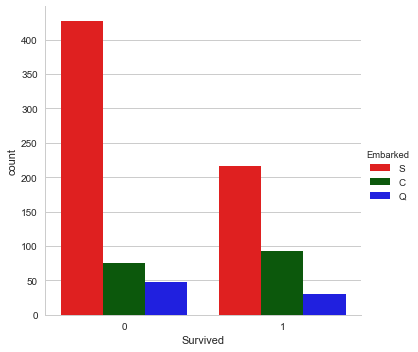

In [23]:
sns.factorplot(x='Survived',data=df_train, hue='Embarked', kind='count', palette=['#ff0000','#006400','#0000ff'], size=5, aspect=1)

In [24]:
pd.crosstab(index=[df_train.Sex, df_train.Embarked], columns=[df_train.Survived], margins=True)

Survived           0    1  All
Sex    Embarked               
female C           9   64   73
       Q           9   27   36
       S          63  140  203
male   C          66   29   95
       Q          38    3   41
       S         364   77  441
All              549  340  889

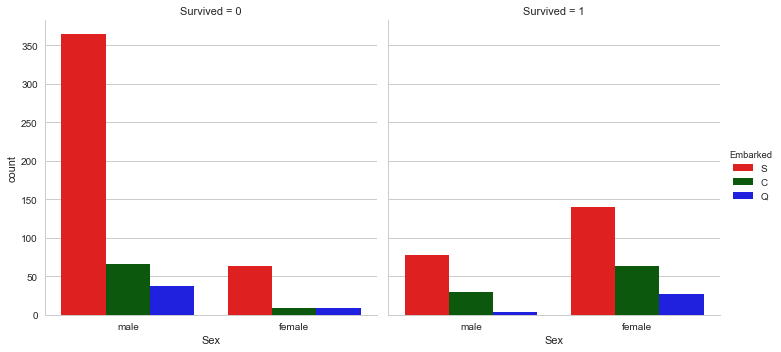

In [25]:
sns.factorplot(x='Sex', data=df_train, kind='count', hue='Embarked', col='Survived', palette=['#ff0000','#006400','#0000ff'], size=5, aspect=1)

### The graph clearly shows that majority of the males embarked with S died. 
### Very few females died who were embarked C or Q.

In [26]:
pd.crosstab(index=[df_train.Pclass, df_train.Embarked], columns=[df_train.Survived], margins=True)

Survived           0    1  All
Pclass Embarked               
1      C          26   59   85
       Q           1    1    2
       S          53   74  127
2      C           8    9   17
       Q           1    2    3
       S          88   76  164
3      C          41   25   66
       Q          45   27   72
       S         286   67  353
All              549  340  889

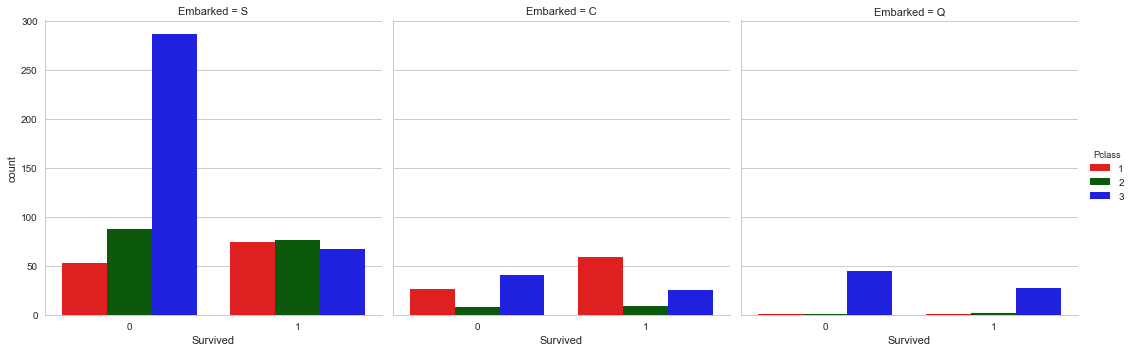

In [27]:
sns.factorplot(x='Survived', col='Embarked', data=df_train, hue='Pclass',kind='count',palette=['#ff0000','#006400','#0000ff'],size=5,aspect=1)